# Calcule de My,Ed

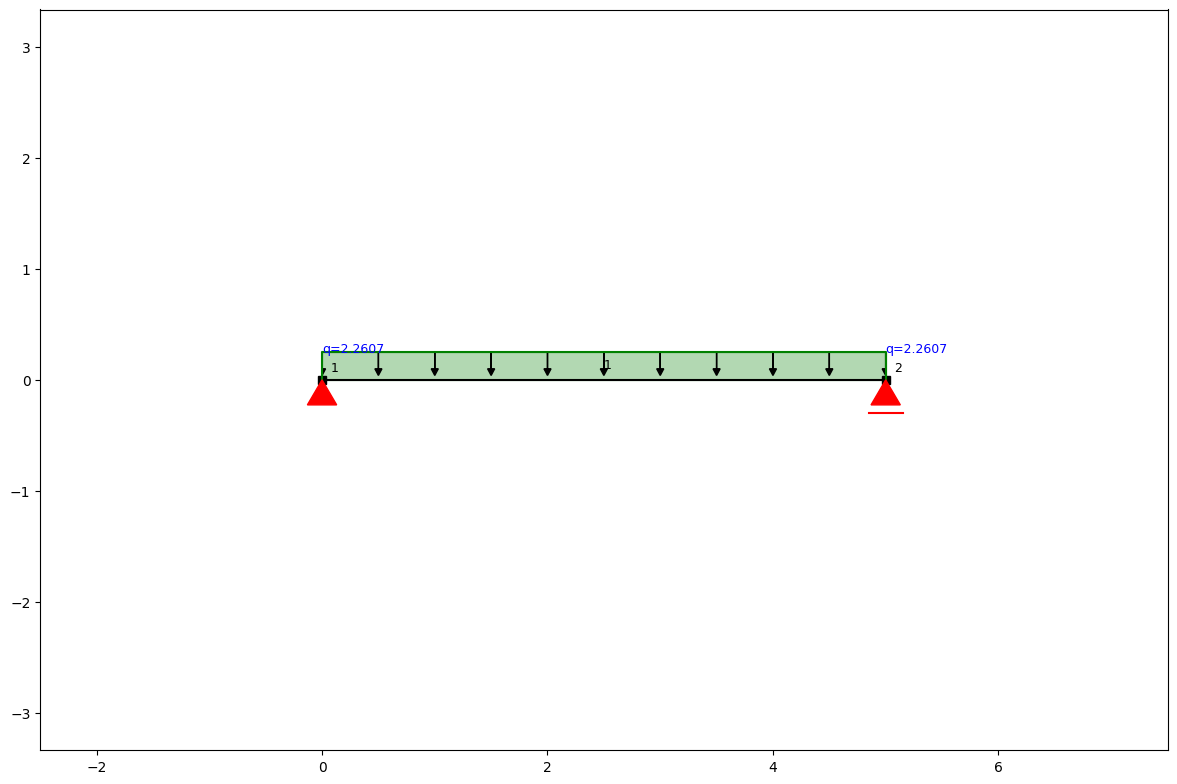

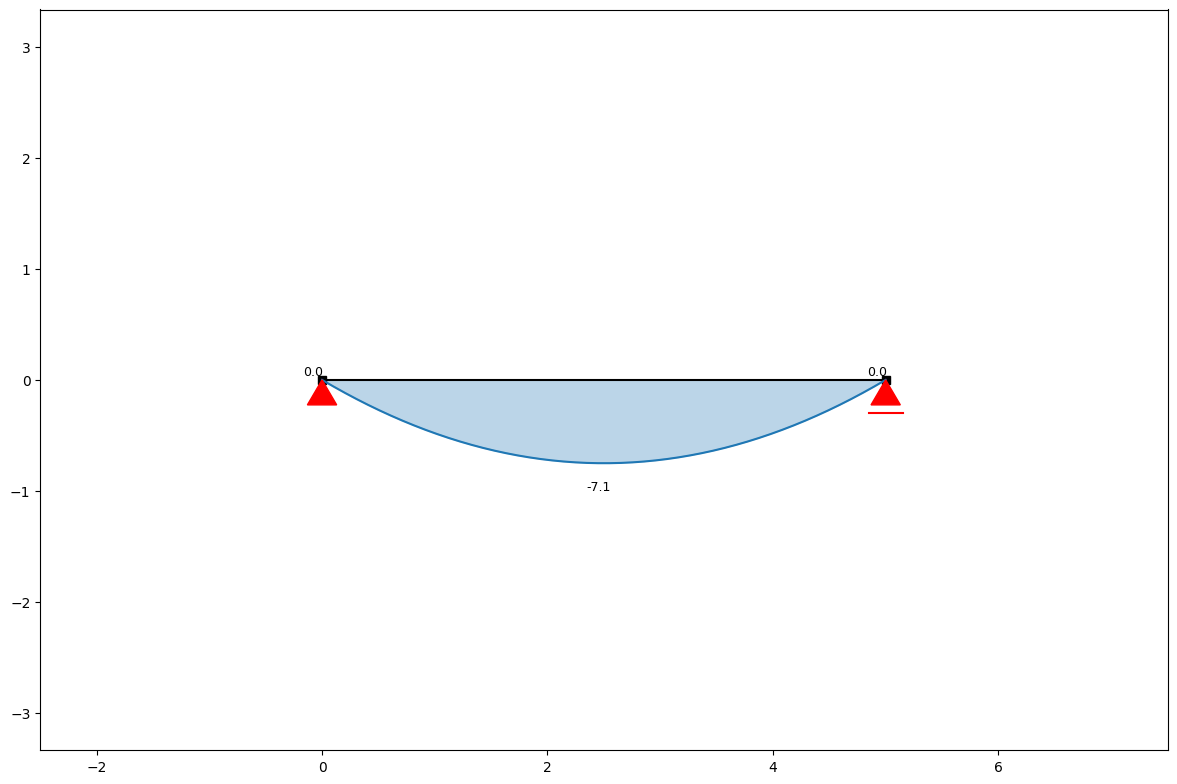

Aucun moment fléchissant trouvé.


In [1]:
from anastruct import SystemElements
import matplotlib.pyplot as plt

def calcul_moment_max(longueur, entraxe, ed):
    # Création du système
    ss = SystemElements()

    # Ajout de la poutre complète
    ss.add_element(location=[[0, 0], [longueur, 0]])

    # Ajout des appuis
    ss.add_support_hinged(1)  # Appui simple au début
    ss.add_support_roll(2)  # Appui simple à la fin

    # Calcul de la charge linéaire répartie qEd
    qEd = ed * entraxe  # Charge linéaire répartie

    # Application de la charge linéaire sur toute la poutre
    ss.q_load(q=-qEd, element_id=[1])

    # Calcul et affichage du système
    ss.solve()
    ss.show_structure()
    ss.show_bending_moment()

    # Extraction du moment fléchissant maximal
    results = ss.get_element_results()
    moments = [abs(result['M']) for result in results if result['M'] is not None]
    
    if moments:
        moment_max = max(moments)
        print(f"Le moment fléchissant maximal est : {moment_max:.2f} kNm")
        return moment_max
    else:
        print("Aucun moment fléchissant trouvé.")
        return 0

# ======= Entrée des valeurs =======
longueur_poutre = 5  # Longueur de la poutre en mètres
entraxe = 0.611  # Entraxe en mètres
Ed = 3.7  # Charge surfacique de dimensionnement en kN/m²
# ==================================

moment_max = calcul_moment_max(longueur_poutre, entraxe, Ed)
